In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [3]:
data = pd.read_csv('train.csv')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

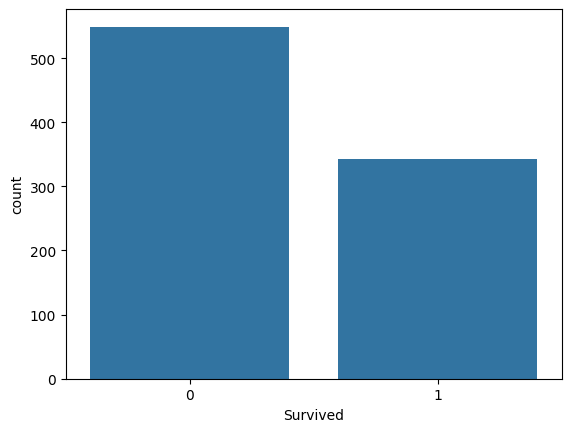

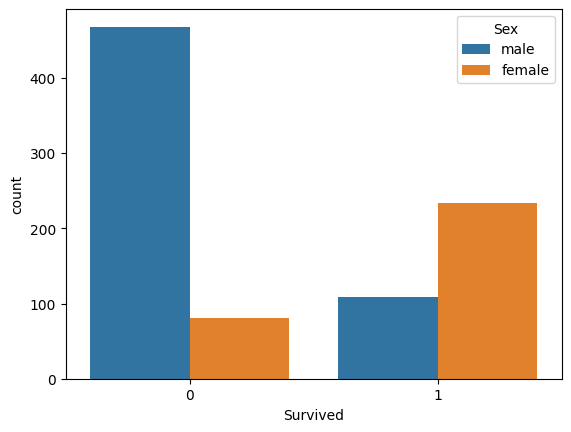

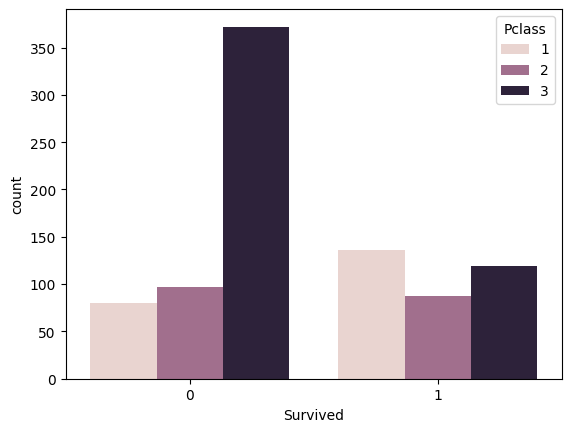

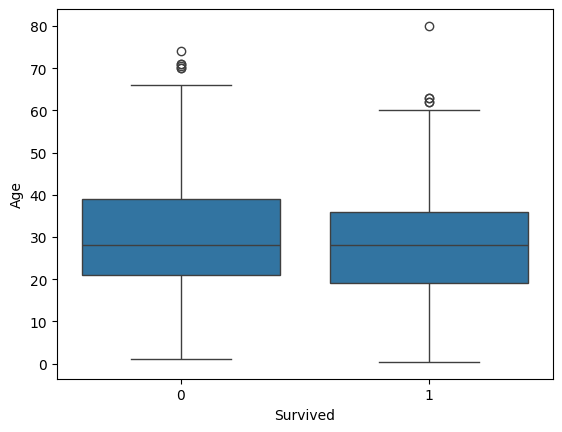

In [4]:

print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize survival based on different features
sns.countplot(x='Survived', data=data)
plt.show()

sns.countplot(x='Survived', hue='Sex', data=data)
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=data)
plt.show()

sns.boxplot(x='Survived', y='Age', data=data)
plt.show()


In [5]:

# Fill missing Age values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column due to many missing values
data.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Separate features and target
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\K\AppData\Local\Temp\ipykernel_24340\861407672.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\K\AppData\Local\Temp\ipykernel_24340\861407672.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [6]:

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [7]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [8]:

# Get feature importance
importance = model.coef_[0]

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


      Feature  Importance
4        Fare    0.126511
6  Embarked_Q   -0.046058
3       Parch   -0.096142
7  Embarked_S   -0.189423
2       SibSp   -0.349952
1         Age   -0.396152
0      Pclass   -0.785328
5    Sex_male   -1.277104
